# Tasks: 

## 1] Load the tweets file using read_csv function from Pandas package. 


## 2] Get the tweets into a list for easy text cleanup and manipulation.




## 3] To cleanup: 

##### 3.1] Normalize the casing.

##### 3.2] Using regular expressions, remove user handles. These begin with '@’.

##### 3.3] Using regular expressions, remove URLs.

##### 3.5] Remove stop words.

##### 3.6] Remove redundant terms like ‘amp’, ‘rt’, etc.

##### 3.7] Remove ‘#’ symbols from the tweet while retaining the term.




## 4] Extra cleanup by removing terms with a length of 1.




## 5] Check out the top terms in the tweets:

##### 5.1] First, get all the tokenized terms into one large list.

#####  5.2] Use the counter and find the 10 most common terms.




## 6] Data formatting for predictive modeling:

#####  6.1] Join the tokens back to form strings. This will be required for the vectorizers.

#####  6.2] Assign x and y.

#####  6.3] Perform train_test_split using sklearn.




## 7] We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

#####  7.1] Import TF-IDF  vectorizer from sklearn.

#####  7.2] Instantiate with a maximum of 5000 terms in your vocabulary.

#####  7.3] Fit and apply on the train set.

#####  7.4] Apply on the test set.




## 8] Model building: Ordinary Logistic Regression

#####  8.1] Instantiate Logistic Regression from sklearn with default parameters.

#####  8.2] Fit into  the train data.

##### 8.3] Make predictions for the train and the test set.



## 9] Model evaluation: Accuracy, recall, and f_1 score.

#####  9.1] Report the accuracy on the train set.

#####  9.2] Report the recall on the train set: decent, high, or low.

#####  9.3] Get the f1 score on the train set.



##  10] Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

#####  10.1]Adjust the appropriate class in the LogisticRegression model.




### 11] Train again with the adjustment and evaluate.

##### 11.1] Train the model on the train set.

#####  11.2] Evaluate the predictions on the train set: accuracy, recall, and f_1 score.




### 12] Regularization and Hyperparameter tuning:

#####  12.1] Import GridSearch and StratifiedKFold because of class imbalance.

#####  12.2] Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

#####  12.3] Use a balanced class weight while instantiating the logistic regression.




### 13] Find the parameters with the best recall in cross-validation.

#####  13.1] Choose ‘recall’ as the metric for scoring.

#####  13.2] Choose a stratified 4 fold cross-validation scheme.

### 13.3] Fit into  the train set.




#####  14] What are the best parameters?




### 15] Predict and evaluate using the best estimator.

#####  15.1] Use the best estimator from the grid search to make predictions on the test set.

#####  15.2] What is the recall on the test set for the toxic comments?

#####  15.3] What is the f_1 score?

# PROJECT  CODE   STARTS   FROM  HERE 

# Task-1]
Load the tweets file using read_csv function from Pandas package. 

In [1]:
# 
import os, re

import nltk
from nltk.tokenize import TweetTokenizer

from string import punctuation

from nltk import FreqDist


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



import matplotlib.pyplot as plt
import seaborn as sns


##### Task  1.1      Load Data Set 

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("TwitterHate.csv")
# View sample data

df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#####   Task  1.2         Understand Data 

In [3]:
# Number Of rows

number_of_rows = len(df.index)
number_of_cols = len(df.columns)
print("Number Of rows:",  number_of_rows)
print('Number of columns :', number_of_cols)
print()
print("Data Info")
df.info()

Number Of rows: 31962
Number of columns : 3

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


#####    Task  1.3    data Sampling 

In [4]:
# Sampling 0.01%  of data randomly 

rows = df.sample(frac =0.0001)

# display
rows

,id,label,tweet
22037,22038,0,the highest happiness on eah is the happiness ...
30710,30711,0,i'm for the #weekend and i will #sing to my ...
1279,1280,0,âfeeling ! just staed my own #avon busines...


In [5]:
# Sampling 3nos of data randomly 

rows = df.sample(n = 3)
rows

,id,label,tweet
20552,20553,0,happy weekend.. ðð¯ #girls #friends #week...
8026,8027,0,for freedom friday @user @user @user @user w...
26645,26646,0,twinklatinboys - na: #slut #snapshot #hot #nas...


In [6]:
# Sample any one row randomly

df.tweet.sample()

8830    great sta to #euro2016 last night with a great...
Name: tweet, dtype: object

In [7]:
df.tweet.sample().values[0]

'anyone else have that one family member (related through marriage) that thrives off back stabbing your actual family?? #grrr   #ikeelu'

#####   Task  1.4       Inspect for Data Imbalance

Count Unique values in The label Columns

In [8]:
df['label'].value_counts(ascending=True)

1     2242
0    29720
Name: label, dtype: int64

Obtain relative frequencies of the unique values.

In [9]:
df['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [10]:
df.label.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

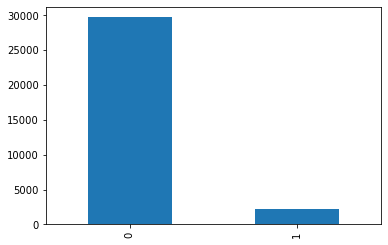

In [11]:
df["label"].value_counts().plot(kind="bar")

# Task-2
Get the tweets into a list for easy text cleanup and manipulation

In [12]:
Tweets_List = df["tweet"].tolist()


In [13]:
type(Tweets_List)

list

In [14]:
len(Tweets_List)

31962

#  Task.3
## To cleanup: 



#### 3.1] Normalize the casing.


In [15]:
def to_lowercase(Tweets_List):
    Tweets_Lowercase = []
    for tweet in Tweets_List:
        Tweets_Lowercase.append(tweet)
    
    return Tweets_Lowercase

Tweets_Lowercase = to_lowercase(Tweets_List)

print("All text Coverted to lowercase !!")

All text Coverted to lowercase !!


####  Task 3.2]:
Using regular expressions, remove user handles. These begin with '@’.


In [16]:
def remove_user_handles(Tweets_Lowercase):
    hashes_removed = [re.sub("@\w+","", tweet) for tweet in Tweets_Lowercase]
    return(hashes_removed)
    




Tweets_Without_User_Handles =  remove_user_handles(Tweets_Lowercase)
print("All User Handles removed from The text !!!")



All User Handles removed from The text !!!


####  Task- 3.3
Using regular expressions, remove URLs.

In [17]:
def remove_URL(Tweets_Without_User_Handles):
    URL_removed = [re.sub("\w+://\S+","", Tweet) for Tweet in Tweets_Without_User_Handles]
    return(URL_removed)
    



Tweets_Without_URL =  remove_URL(Tweets_Without_User_Handles)
print("All URLs remved form the text !!")


All URLs remved form the text !!


#### Task- 3.4
Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.



In [18]:
def Tokenize(Tweets_Without_URL):
    t = TweetTokenizer()
    Tokens = [t.tokenize(Tweet) for Tweet in Tweets_Without_URL]
    return Tokens


Tweet_Tokens  = Tokenize(Tweets_Without_URL)


print("All the text converted to tokens !!")


All the text converted to tokens !!


#### Task- 3.5
Remove stop words.


In [19]:
from nltk.corpus import stopwords

def Remove_StopWords(Tweet_Token):
    stop_words = stopwords.words("english")
    Without_StopWords = [Term for Term in Tweet_Token if not Term in stop_words]
    return Without_StopWords

Tweets_Without_StopWords =  [Remove_StopWords(Tweet_Token) for Tweet_Token in Tweet_Tokens ]
 
print("All STOPWORDS removed from the text !!")


All STOPWORDS removed from the text !!


#### Task- 3.6
Remove redundant terms like ‘amp’, ‘rt’, etc.


In [20]:
def Remove_Redunts(Tweets_Without_StopWords):
    redunt_terms = ['rt', 'amp']
    #Without_ReduntWords = [word for word in Tweets_Without_StopWords if not word in redunt_terms]
    Without_ReduntWords = [word for word in Tweets_Without_StopWords if not word in redunt_terms]
    return Without_ReduntWords

Tweets_Without_Redunt_Words = Remove_Redunts(Tweets_Without_StopWords)
print("All Redunt words removed from the text !!")



All Redunt words removed from the text !!


####  Task.3.7
Remove ‘#’ symbols from the tweet while retaining the term.

In [21]:
def Remove_Hash(Tweet):
    return [re.sub("#","", term) for term in Tweet ]



Tweets_Without_Hashes = [Remove_Hash(Tweet) for Tweet in Tweets_Without_Redunt_Words]


print("All Hashes(#) removed from the text !!")




All Hashes(#) removed from the text !!


## Task.4


####  Task  4.1 
Extra Cleanup by removing terms with a length of 1

In [22]:
def Remove_Single_Letter(Tweet):
    Without_Single_Letter = [word for word in Tweet if (len(word)>1)]
    return Without_Single_Letter





Tweets_Without_Single_Letters  = [Remove_Single_Letter(Tweet) for Tweet in Tweets_Without_Hashes]

print("All Single Letters removed from the text !!")

All Single Letters removed from the text !!


#### Task 4.2
Remove all types of Punctuations







In [23]:
from string import punctuation
punctuations = list(punctuation)

Additional_punctuations = ['...','``',"''",".."]

punctuations.extend(Additional_punctuations)

def Remove_Punctuations(Tweet):
    Without_Punctuations = [Term for Term in Tweet if Term not in punctuations]
    return Without_Punctuations





Cleaned_Tweets  = [Remove_Punctuations(Tweet) for Tweet in Tweets_Without_Single_Letters]
print("All punctuations removed!!")

All punctuations removed!!


####  Cleaned Tweets Sample 

In [24]:
print("Cleaned Tweets sample:")
print(Cleaned_Tweets[2:4])

Cleaned Tweets sample:
[['bihday', 'majesty'], ['model', 'love', 'take', 'time', 'urð']]


# Task.5
Check out the top terms in the tweets

####  Task 5.1
First, get all the tokenized terms into one large list.



In [25]:
# Merge All word lists in to a single List of words so that counting can be done

Merged_Tweets = []

for Tweet in Cleaned_Tweets:
    Merged_Tweets.extend(Tweet)
    

    
len(Merged_Tweets  )

251558

#### Task  5.2 
Use the counter and find the 10 most common terms.

In [26]:
from collections import Counter



term_count = Counter(Merged_Tweets)
term_count.most_common(10)  

[('love', 2748),
 ('day', 2276),
 ('happy', 1684),
 ('time', 1131),
 ('life', 1118),
 ('like', 1047),
 ("i'm", 1018),
 ('today', 1013),
 ('new', 994),
 ('thankful', 946)]

####  Task  5.3

Graphical Representation of the Top ten common terms

#####  Create a  Df 

In [27]:
term_count_Df = pd.DataFrame(term_count.most_common(15),
                             columns=['words', 'count'])

term_count_Df.head(10)

,words,count
0,love,2748
1,day,2276
2,happy,1684
3,time,1131
4,life,1118
5,like,1047
6,i'm,1018
7,today,1013
8,new,994
9,thankful,946


######   Plot Using the data in df 

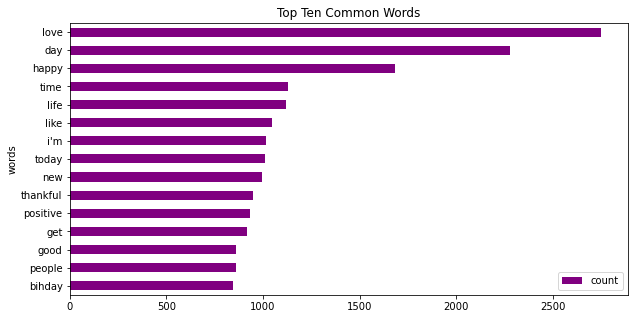

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot horizontal bar graph
term_count_Df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Top Ten Common Words")

plt.show()


##  Task.6
Data formatting for predictive modeling 

####  Task.6.1
Join the tokens back to form strings. This will be required for the vectorizers.


In [29]:
len(Cleaned_Tweets)
Cleaned_Tweets[1]

['thanks',
 'lyft',
 'credit',
 "can't",
 'use',
 'cause',
 'offer',
 'wheelchair',
 'vans',
 'pdx',
 'disapointed',
 'getthanked']

In [30]:
def form_string(Cleaned_Tweets):
    String = [" ".join(Tweet) for Tweet in Cleaned_Tweets]
    return String

Tweets = form_string(Cleaned_Tweets)
Tweets[0]

'father dysfunctional selfish drags kids dysfunction run'

##  Cross check If  data is intact 

In [31]:
print("No Of Rows In Original Data:", len(df.label))
print("No Of Rows In Cleaned Data:", len(Tweets))

No Of Rows In Original Data: 31962
No Of Rows In Cleaned Data: 31962


#### Task 6.2
Assign x and y.

In [32]:
X = Tweets
y = df.label.values

####  Task. 6.3
Perform train_test_split using sklearn.

In [33]:
test_size = 0.25
random_state=100


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)

print("X_train Size:", len(X_train))
print("X_test Size:", len(X_test))

X_train Size: 23971
X_test Size: 7991


## Task.7
We’ll use TF-IDF values for the terms as a feature to get into a vector space model.




##### Task  7.1
Import TF-IDF  vectorizer from sklearn.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

####  Task 7.2
Instantiate with a maximum of 5000 terms in your vocabulary.

In [35]:
max_features = 5000

vectorizer = TfidfVectorizer(max_features = max_features)

####  Task 7.3
Fit and apply on the train set.



In [36]:
X_train_TFV= vectorizer.fit_transform(X_train)


#### Task  7.4
Apply On Test

In [37]:
X_test_TFV = vectorizer.transform(X_test)

In [38]:
print("X_train_TFV.shape:", X_train_TFV.shape)
print("X_test_TFV.shape", X_test_TFV.shape)

X_train_TFV.shape: (23971, 5000)
X_test_TFV.shape (7991, 5000)


# Task.8
Model building: Ordinary Logistic Regression

#### Task  8.1
Instantiate Logistic Regression from sklearn with default parameters.


In [39]:
Model = LogisticRegression()



####  Task  8.2
Fit into  the train data.



In [40]:
Model.fit(X_train_TFV, y_train)

LogisticRegression()

#### Task  8.3
Make predictions for the train and the test set.

In [41]:
y_train_pred = Model.predict(X_train_TFV)
y_test_pred = Model.predict(X_test_TFV)




# Task.9
Model evaluation: Accuracy, recall, and f_1 score.



####  Task 9.1
Report the accuracy on the train set.



In [42]:

accuracy =  round(accuracy_score(y_train, y_train_pred)*100, 2)

print("Accuracy Of the Model {0}%" .format(accuracy) )


Accuracy Of the Model 95.57%


#### Task 9.2
Report the recall on the train set: decent, high, or low.



In [43]:
from sklearn import metrics

Decent =  round(metrics.recall_score(y_train, y_train_pred, average='macro')*100, 2)
Low = round(metrics.recall_score(y_train, y_train_pred) * 100)
High = round(metrics.recall_score(y_train, y_train_pred, average='weighted')*100, 2)
    
    
print("Recall score- Decent: {}%".format(Decent) )
print("Recall score- Low: {}%".format(Low) )
print("Recall score- High: {}%".format(High ) )

Recall score- Decent: 69.28%
Recall score- Low: 39%
Recall score- High: 95.57%


In [44]:
print()
print("Classification Report:")
print()
print(classification_report(y_train, y_train_pred))
report = classification_report(y_train, y_train_pred)



Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22289
           1       0.95      0.39      0.55      1682

    accuracy                           0.96     23971
   macro avg       0.95      0.69      0.76     23971
weighted avg       0.96      0.96      0.95     23971



#### Task 9.3
Get the f1 score on the train set.

In [45]:
from sklearn.metrics import f1_score

print("F1 Score: {}%".format(round(f1_score(y_train, y_train_pred)*100,2) ))

F1 Score: 55.05%


### Learners Comments

It clearly is an indication of data imbalance. The same is evidenced earlier and is represented in Line No.11

# Task 10
Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

#### 10.1
Adjust the appropriate class in the LogisticRegression model.

In [46]:
Model  = LogisticRegression(class_weight="balanced")

# Task 11
Train again with the adjustment and evaluate.


## Task  11.1 

Train the model on the train set.

In [47]:
Model.fit(X_train_TFV, y_train)

LogisticRegression(class_weight='balanced')

####  Task  11.2

Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

In [48]:
y_train_pred = Model.predict(X_train_TFV)
y_test_pred = Model.predict(X_test_TFV)



accuracy = round(accuracy_score(y_train, y_train_pred), 2)*100
print("accuracy: {}%" .format(accuracy) )
print()


Decent = round(metrics.recall_score(y_train, y_train_pred, average='macro')*100, 2 )
Low = round(metrics.recall_score(y_train, y_train_pred)*100, 2 )
High = round(metrics.recall_score(y_train, y_train_pred, average='weighted')*100,2 )


print("Recall score- Decent: {}%".format(Decent) )
print("Recall score- Low: {}%" .format(Low) )
print("Recall score- High: {}%".format(High) )
print()


print("F1 Score: {}%".format(round(f1_score(y_train, y_train_pred)*100), 2))




accuracy: 95.0%

Recall score- Decent: 95.88%
Recall score- Low: 97.21%
Recall score- High: 94.74%

F1 Score: 72%


In [49]:
print("Classification Report:")
print()
print(classification_report(y_train, y_train_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     22289
           1       0.57      0.97      0.72      1682

    accuracy                           0.95     23971
   macro avg       0.79      0.96      0.85     23971
weighted avg       0.97      0.95      0.95     23971



# Task.12
Regularization and Hyperparameter tuning:

####  Task  12.1
Import GridSearch and StratifiedKFold because of class imbalance.

In [50]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#### Task 12.2
Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

In [51]:
param_grid = { 'C': [0.001,  0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                'penalty': ["l1", "l2", "elasticnet"],
                'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
                'max_iter': [500],
              
             }



####  Task  12.3
Use a balanced class weight while instantiating the logistic regression.

In [52]:
Model = LogisticRegression(class_weight="balanced")

# Task  13
Find the parameters with the best recall in cross-validation.

#### Task  13.1
Choose ‘recall’ as the metric for scoring.

#### Task  13.2
Choose a stratified 4 fold cross-validation scheme.

#### Task  13.3
Fit into  the train set.

In [53]:
# Instantiate the grid search model


grid_search = GridSearchCV(estimator = Model, 
                           param_grid = param_grid, 
                           cv = StratifiedKFold(4), 
                           n_jobs = -1, 
                           verbose = 1, 
                           scoring =  "recall",
                                           
                          )





result = grid_search.fit(X_train_TFV, y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.                nan 0.66942795 0.66942795
 0.70271604 0.67061136        nan        nan        nan        nan
        nan        nan 0.11118793        nan 0.69856068 0.69856068
 0.70509558 0.69856068        nan        nan        nan        nan
        nan        nan 0.58144017        nan 0.76753195 0.76753195
 0.76812719 0.76753195        nan        nan        nan        nan
        nan        nan 0.67715049        nan 0.77110338 0.77110338
 0.77110338 0.77110338        nan        nan        nan        nan
        nan        nan 0.71757437        nan 0.77644921 0.77644921
 0.77704445 0.77644921        nan        nan        nan        nan
        nan        nan 0.73184595        nan 0.77704304 0.77704304
 0.77763686 0.77704304        nan        nan        nan        nan
        nan        nan 0.74135844        nan 0.7770416

# Task  14
What are the best parameters?

In [54]:
print('Best Score: {}%'.format(round(result.best_score_, 2)*100))
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 78.0%
Best Hyperparameters: {'C': 0.7, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}


# Task  15
Predict and evaluate using the best estimator.



#### Task  15.1
Use the best estimator from the grid search to make predictions on the test set.



In [55]:
y_test_pred = grid_search.best_estimator_.predict(X_test_TFV)
y_train_pred = grid_search.best_estimator_.predict(X_train_TFV)


####  Task  15.2
What is the recall on the test set for the toxic comments?

In [56]:
Decent =  round(metrics.recall_score(y_train, y_train_pred, average='macro'),2 )*100
Low    =  round(metrics.recall_score(y_train, y_train_pred),2 )*100
High   =  round(metrics.recall_score(y_train, y_train_pred, average='weighted'),2 )*100


print("Recall score- Decent: {}%". format(Decent))
print("Recall score- Low: {}%". format(Low))
print("Recall score- High: {}%". format(High))


Recall score- Decent: 95.0%
Recall score- Low: 96.0%
Recall score- High: 94.0%


#### Task 15.3
What is the f_1 score?

In [57]:
print("F1 Score: {}%".format(round(f1_score(y_train, y_train_pred),2)*100))

F1 Score: 71.0%


#### Task 15.4
Full Classificatio Report

In [58]:
print("Classification Report:")
print()
print(classification_report(y_test, y_test_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      7431
           1       0.47      0.79      0.59       560

    accuracy                           0.92      7991
   macro avg       0.73      0.86      0.77      7991
weighted avg       0.95      0.92      0.93      7991



In [59]:
accuracy = round(accuracy_score(y_test, y_test_pred), 2)*100
print("Finale accuracy: {}%" .format(accuracy) )
print()

Finale accuracy: 92.0%



# Learners comments

1)  Have observed the severity of the impact of unbalanced data on the model. Realized the need to  balance the data wherever required.

2) I would say the model is excellent with 90% Confidence.

3) It still has a scope to experiment with Nl processing libraries and utilising ML models.

4) I would like to implement neural networks to build a model for this task. As such I have not built one in tis project as it is outside the scope of the project.


# END OF THE PROJECT